In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime


years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

In [3]:
df = pd.read_csv("data/output/final_with_states.csv", parse_dates = ['date'])
df['date'] = pd.to_datetime(df.date).dt.tz_localize(None)
df['date_day'] = pd.to_datetime(df['date']).dt.date
df['date_week'] = df['date'].dt.strftime('%Y-%U')
df['date_month'] = df['date'].dt.strftime('%Y-%m')

df_fullmonths = df[df['date_month']!= '2021-12'] #getting rid of tweets from 2021-12

df_US = df_fullmonths.loc[df_fullmonths['country']== 'US']
df_GB = df_fullmonths.loc[df_fullmonths['country']== 'GB']
df_AU = df_fullmonths.loc[df_fullmonths['country']== 'AU']
df_IN = df_fullmonths.loc[df_fullmonths['country']== 'IN']
df_CA = df_fullmonths.loc[df_fullmonths['country']== 'CA']

dfGB = df_GB.set_index('date')
dfGB = dfGB['score'].resample('W').mean()
dfAU = df_AU.set_index('date')
dfAU = dfAU['score'].resample('W').mean()
dfIN = df_IN.set_index('date')
dfIN = dfIN['score'].resample('W').mean()
dfCA = df_CA.set_index('date')
dfCA = dfCA['score'].resample('W').mean()

vaccs = pd.read_csv('data/output/Vaccinations_us_first', parse_dates = ['Date'])
dfv = vaccs.filter(items=['Date', 'Admin_Per_100K'])


#print(df_fullmonths)
df_fullmonths.dtypes

valid_id                int64
date           datetime64[ns]
full_name              object
country                object
lon                   float64
lat                   float64
followers               int64
retweets                int64
replies                 int64
likes                   int64
quotes                  int64
coordinates            object
name                   object
admin1                 object
admin2                 object
score                 float64
date_day               object
date_week              object
date_month             object
dtype: object

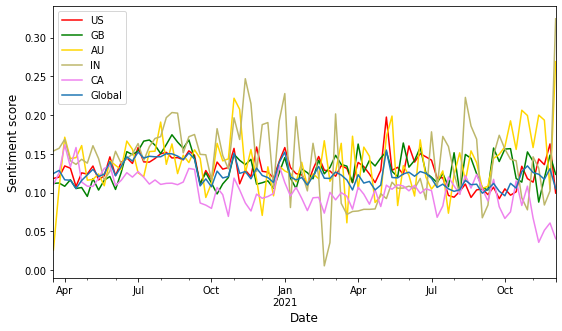

In [5]:
#Global mean sentiment over time
df3 = df_fullmonths.set_index('date')
df3 = df3['score'].resample('W').mean() # change 'W' to 'M' to see monthly chenges



df4 = df_US.set_index('date')
df4 = df4['score'].resample('W').mean()
df4.plot(color='red', label='US')

dfGB.plot(color='green', label='GB')
dfAU.plot(color='gold', label='AU')
dfIN.plot(color='darkkhaki', label='IN')
dfCA.plot(color='violet', label='CA')
df3.plot(label='Global')

plt.ylabel('Sentiment score', fontsize=12)
plt.xlabel('Date', fontsize=12)
leg = plt.legend(loc='upper left')

#plt.xlabel('Date', fontsize=12)
#plt.ylabel('Sentiment score', fontsize=12)
plt.savefig('sentiment_overtime.png', dpi=300, bbox_inches = "tight")
#this plot shows a nice cyclicity in sentiments, e.g. it can be seen how the 2nd/3rd wave is reflected in a decline of sentiment score
#while the vaccine becoming ready resulted in a spike in January

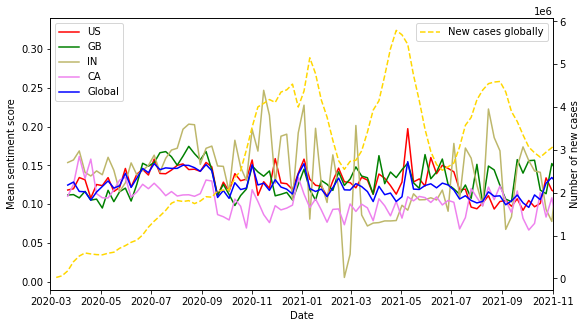

In [6]:
#plotting the mean sentiment score globally and for the top 4 countries with the most tweets
#the second y-axis shows the number of new registered covid cases globally
cases = pd.read_csv('newcases.csv', parse_dates = ['date'])
casesy=cases[cases['date']< '2021-12-01']
casesww= casesy[casesy['date']> '2020-03-01']
casesw = casesww[casesww['location']== 'World']
dfc= casesw.filter(items=['date', 'new_cases'])
plt.rcParams["figure.figsize"]=(9, 5)

dfcc=dfc.groupby(["date"]).sum()#.plot()
#dfx = dfcc['new_cases'].resample('W').mean()
#dfx.plot()
#cases.info(verbose=True)
dfcc
dfx = dfcc['new_cases'].resample('W').sum()
#dfx.plot()


fig, ax1 = plt.subplots()
ax1.set_xlabel('Date')
ax1.set_ylabel('Mean sentiment score')

df3 = df_fullmonths.set_index('date')
df3 = df3['score'].resample('W').mean()
ax1.plot(df4,color='red', label='US')
ax1.plot(dfGB, color='green', label='GB')
ax1.plot(dfIN,color='darkkhaki', label='IN')
ax1.plot(dfCA, color='violet', label='CA')
ax1.plot(df3, color='blue', label='Global')
plt.legend(loc='upper left')
#df3.plot()
#df4.plot()
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
ax2.set_ylabel('Number of new cases')
dfvv=dfv.groupby(["Date"]).sum()#.plot()


ax2.plot(dfx, color='gold', linestyle='--', label='New cases globally')
plt.legend(loc='upper right')
#ax1.plot(df3)
ax2.tick_params(axis='y')
#dfvvt = dfvv.set_index('date')
#dfvvt
#dfvv.set_index('Date').plot(ax1=ax2)

#df[['x','z']].set_index('x').plot(ax=ax2)
#ax1.set_xlim([datetime.date(2020, 3, 1), datetime.date(2021, 11, 30)])

plt.xlim(
    xmin=datetime(2020, 3, 1), # the one that doesn't change
    xmax=datetime(2021, 11, 1) # the latest datetime in your dataset
)

plt.savefig('sentiment_overtime.png', dpi=400, bbox_inches = "tight")


Text(0.5, 0, 'Date')

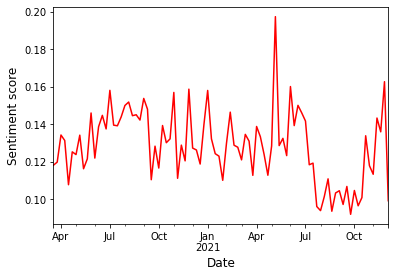

In [31]:
#Mean sentiment score over time in US and GB
df4 = df_US.set_index('date')
df4 = df4['score'].resample('W').mean()
df4.plot(color='red')
plt.ylabel('Sentiment score', fontsize=12)
plt.xlabel('Date', fontsize=12)


#df5 = df_GB.set_index('date')
#df5 = df5['score'].resample('W').mean()
#df5.plot(color='blue')


array([[<AxesSubplot:title={'center':'score'}>]], dtype=object)

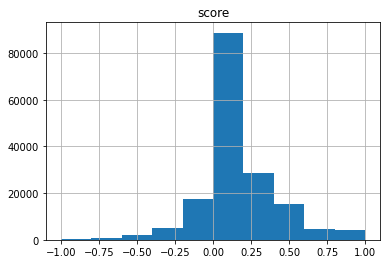

In [103]:
#Frequency of sentiment scores in the US 
df1 = df_US.filter(items=[ 'date_day', 'score'])

df1.hist()

#here I tried to create intervals for sentiment scores not sure if it's correct 
#bins = [df1.score.mean() + (df1.score.std() * v) for v in np.linspace(-1, 1, 10)]
#df1['bins'] = pd.cut(df1.score, bins=bins)
#df1.groupby('bins')['score'].count().plot.bar()

array([[<AxesSubplot:title={'center':'score'}>]], dtype=object)

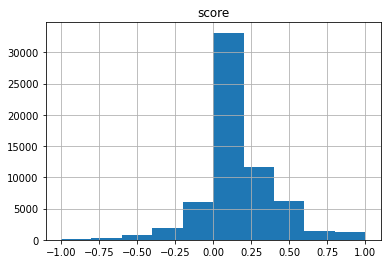

In [102]:
#Frequency of sentiment scores in GB
df2 = df_GB.filter(items=[ 'date_day', 'score'])

df2.hist()

<AxesSubplot:xlabel='date,date'>

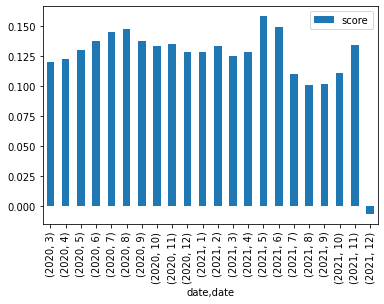

In [115]:
#Mean sentiment score in US over time, monthly bar chart
df6 = df_US.filter(items=[ 'date', 'score'])

df6.groupby([df6["date"].dt.year, df6["date"].dt.month]).mean().plot(kind="bar")


<AxesSubplot:xlabel='date,date'>

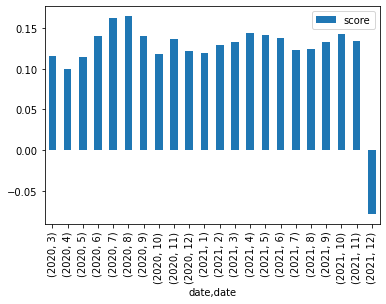

In [116]:
#Mean sentiment score in GB over time, monthly bar chart
df7 = df_GB.filter(items=[ 'date', 'score'])

df7.groupby([df7["date"].dt.year, df7["date"].dt.month]).mean().plot(kind="bar")


<AxesSubplot:xlabel='date,date'>

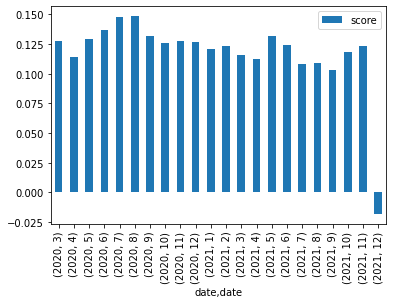

In [4]:
#Global mean sentiment score over time, monthly bar chart
df8 = df.filter(items=['country', 'date', 'score'])

df8.groupby([df8["date"].dt.year, df8["date"].dt.month]).mean().plot(kind="bar")


,country,counts
11,AU,10890
34,CA,41038
69,GB,63461
93,IN,25046
147,NG,6072
159,PH,6607
205,US,170196
217,ZA,7060


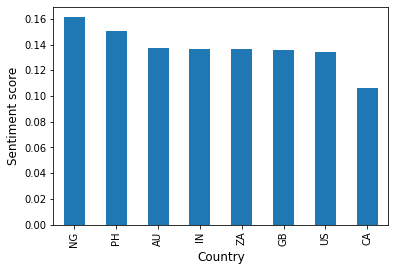

In [16]:
#Mean sentiment score over the countries with more than 1000 tweets
df9 = df_fullmonths.filter(items=['country', 'score'])

df10 = df9.groupby(df9["country"]).size().reset_index(name='counts') 

filtered = df10.loc[df10["counts"] > 5000] #only look at countries where we have more than 1000 tweets

df11 = df9.loc[df9["country"].isin(filtered.country)]
#df11.groupby(df11["country"]).mean().plot(kind="bar")
df12 = df11.groupby(df11["country"]).mean()
df12.sort_values(by=["score"], ascending=False).plot(kind="bar", legend=None)
#df12.plot(kind="bar")
plt.ylabel('Sentiment score', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.savefig('sentiment_overlocation.png', dpi=300, bbox_inches = "tight")
filtered